In [81]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.style.use('dark_background')

In [82]:
X, y = make_blobs(n_samples=100, random_state=1)

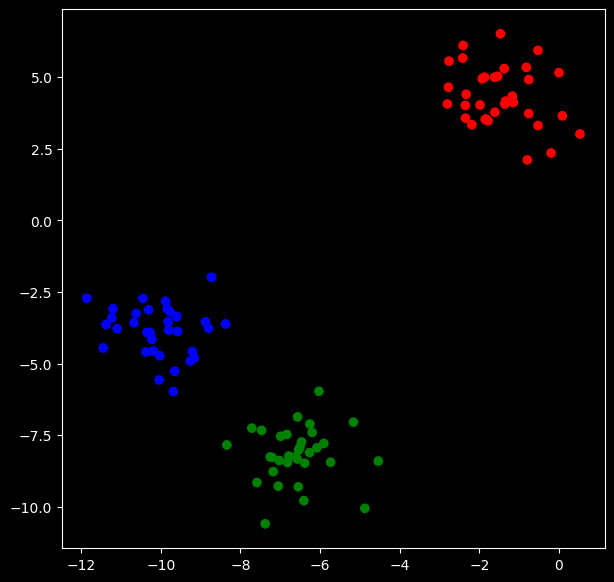

In [83]:
light_colors = ListedColormap(['red', 'blue', 'green'])

plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=light_colors)
plt.show()

In [84]:
# Euclidean distance
def e_metrics(x1 , x2):
    distance = np.sum(np.square(x1 - x2))
    return np.square(distance)

In [90]:
def kmeans(data, k, max_iterations, min_distance):
    clusters = {i: [] for i in range(k)}
    centroids = [data[i] for i in range(k)]

    for _ in range(max_iterations):
        for x in data:
            distances = [e_metrics(x, centroid) for centroid in centroids]
            cluster = distances.index(min(distances))
            clusters[cluster].append(x)

        old_centroids = centroids.copy()

        for cluster in clusters:
            centroids[cluster] = np.mean(clusters[cluster], axis=0)

        optimal = True
        for centroid in range(len(centroids)):
            if np.linalg.norm(centroids[centroid] - old_centroids[centroid], ord=2) > min_distance:
                optimal = False
                break

        if optimal:
            break

    return old_centroids, clusters

In [91]:
def visualize(centroids, clusters):
    colors = ['r', 'g', 'b', 'orange', 'yellow']
    plt.figure(figsize=(7, 7))

    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='white')

    for cluster_item in clusters:
        for x in clusters[cluster_item]:
            plt.scatter(x[0], x[1], color=colors[cluster_item])

    plt.show()

In [92]:
max_iterations = 1
min_distance = 1e-4
k=3

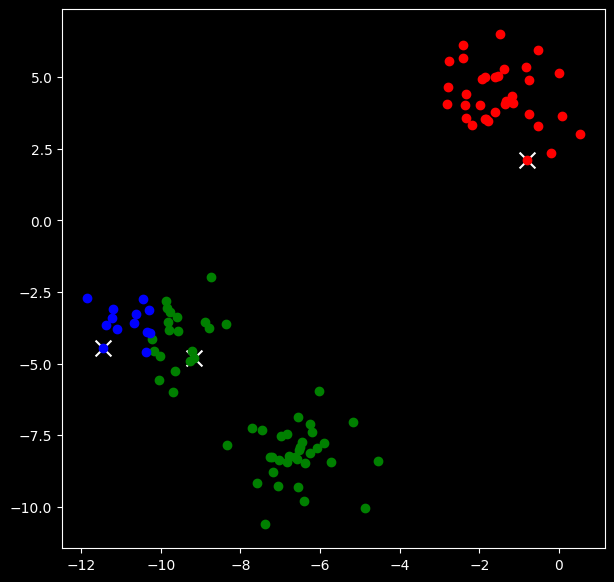

In [93]:
centroids, clusters = kmeans(X, k, max_iterations, min_distance)
visualize(centroids, clusters)

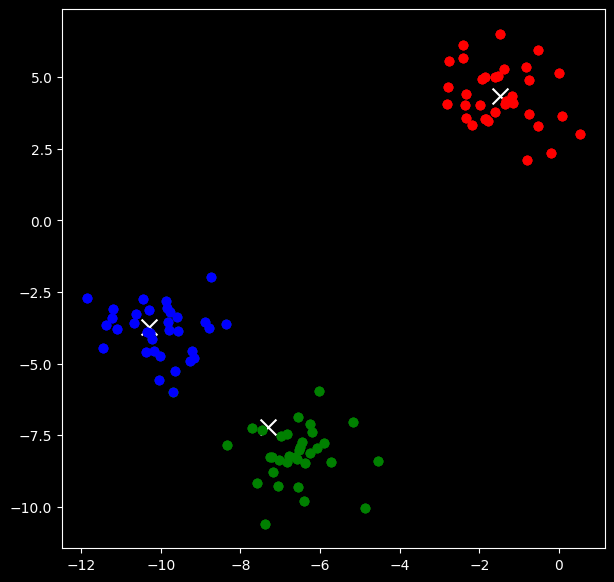

In [94]:
max_iterations = 3
centroids, clusters = kmeans(X, k, max_iterations, min_distance)
visualize(centroids, clusters)

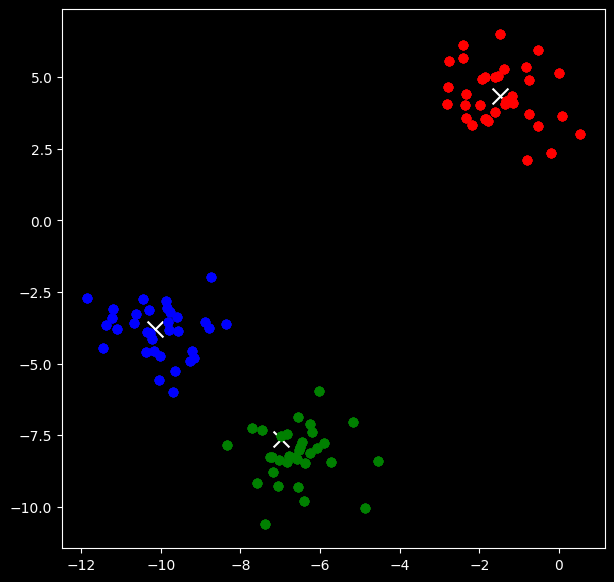

In [95]:
max_iterations = 5
centroids, clusters = kmeans(X, k, max_iterations, min_distance)
visualize(centroids, clusters)

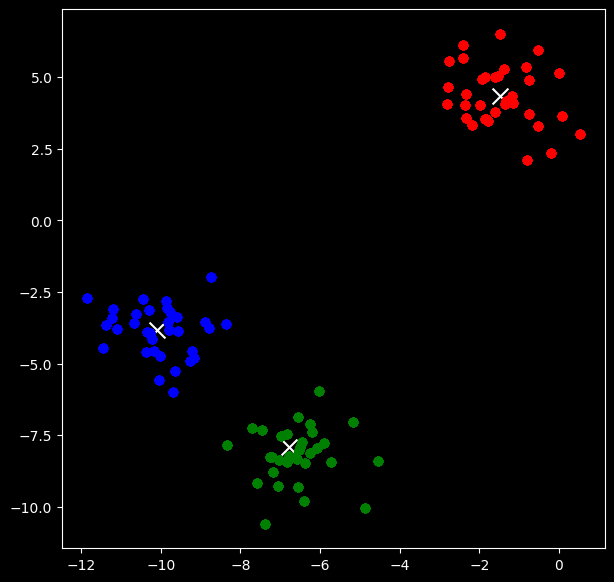

In [96]:
max_iterations = 10
centroids, clusters = kmeans(X, k, max_iterations, min_distance)
visualize(centroids, clusters)